
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [37]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.csv` file and show a short description

In [3]:
df = pd.read_csv('regression_example.csv')
df.head(5)

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
0,0,1.509081,-1.049118,1.978885,1.060733,NaN,0.824655,0.819409,-1.157708,214.593802
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189


## Data Exploration and preparation

##### Show a short description of the columns

In [5]:
df.describe()

,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
count,843.000000,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,421.000000,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,243.497433,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,0.000000,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,210.500000,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,421.000000,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,631.500000,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,842.000000,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [14]:
len(df) - len(df.dropna())

273

#### Drop data that are useless or not usable

In [15]:
df = df.dropna()
df.shape

(570, 10)

In [18]:
df = df.drop('idx', axis=1)
df.head(5)

,F0,F1,F2,F3,F4,F5,F6,F7,response
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [19]:
target = 'response'

X = df.drop(target, axis=1)
y = df[target]

X.shape,y.shape

((570, 8), (570,))

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

<Figure size 936x936 with 0 Axes>

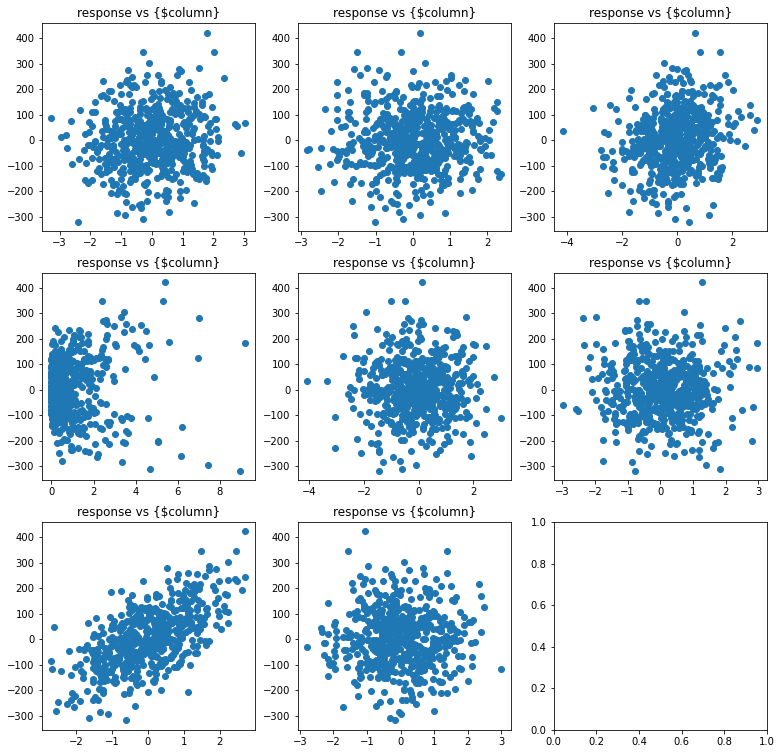

In [48]:
fig, axs = plt.subplots(3, 3, figsize=(13,13))

i = 0
for column in X:
    row = int(i / 3)
    col = i % 3
    axs[row,col].scatter(df[column],y)
    axs[row,col].set_title("response vs {$column}")
    i = i + 1


,F0,F1,F2,F3,F4,F5,F6,F7,response
F0,1.000000,0.007365,0.033151,0.000976,-0.017571,0.062904,0.044181,-0.001822,0.099714
F1,0.007365,1.000000,0.067446,-0.095361,-0.024113,-0.061430,-0.025050,0.017267,0.019469
F2,0.033151,0.067446,1.000000,0.028027,-0.049617,0.041146,-0.014830,0.035332,0.189681
F3,0.000976,-0.095361,0.028027,1.000000,-0.034434,0.044278,0.029957,-0.027759,0.085975
F4,-0.017571,-0.024113,-0.049617,-0.034434,1.000000,-0.042752,0.093363,-0.018163,0.012029
F5,0.062904,-0.061430,0.041146,0.044278,-0.042752,1.000000,0.005411,-0.040804,-0.021827
F6,0.044181,-0.025050,-0.014830,0.029957,0.093363,0.005411,1.000000,-0.014879,0.613199
F7,-0.001822,0.017267,0.035332,-0.027759,-0.018163,-0.040804,-0.014879,1.000000,0.002628
response,0.099714,0.019469,0.189681,0.085975,0.012029,-0.021827,0.613199,0.002628,1.000000


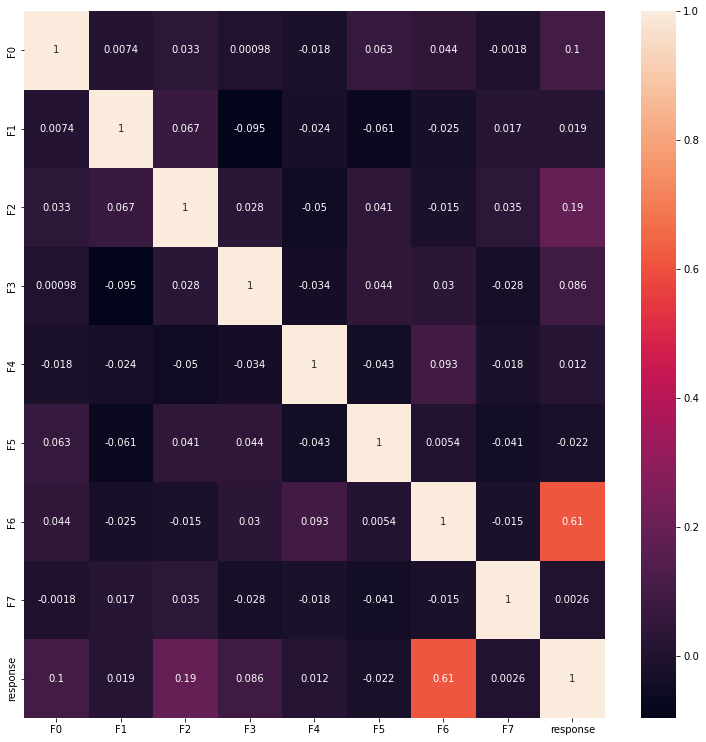

In [50]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)
df.corr()

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [184]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=random_state)
Xtrain.shape,ytrain.shape

((399, 8), (399,))

## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

In [185]:
chosen_variable = df.corr()[target].drop(target).idxmax()

RX = df[chosen_variable].to_frame()
Ry = df[target]

RXtrain, RXtest, Rytrain, Rytest = train_test_split(RX, Ry, train_size=0.7, random_state=random_state)
RXtrain.shape,Rytrain.shape

((399, 1), (399,))

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [211]:
reg = linear_model.LinearRegression()
reg.fit(RXtrain,Rytrain)
reg.coef_

regressions_predict = {}

y_true, y_pred = Rytest, reg.predict(RXtest)
regressions_predict['univariate linear regression'] = y_pred

#### Compute the quality measures

In [212]:
mean_squared_error(y_true,y_pred),r2_score(y_true, y_pred)


(7245.711320661929, 0.33847681347897574)

## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [213]:
reg = linear_model.LinearRegression()
reg.fit(Xtrain,ytrain)
reg.coef_

y_true, y_pred = ytest, reg.predict(Xtest)
regressions_predict['linear regression'] = y_pred

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [214]:
reg.coef_

array([ 9.22532932,  2.79484589, 21.76617086,  3.29959357, -5.53238646,
       -6.00288389, 72.94962525, -2.67582365])

#### Compute the quality measures

In [215]:
mean_squared_error(y_true,y_pred),r2_score(y_true, y_pred)

(6577.886025358827, 0.3994483175642217)

## Decision Tree Multivariate Regresson

In [216]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [217]:
reg = DecisionTreeRegressor(random_state=random_state)
reg.fit(Xtrain,ytrain)
print("The maximum depth of the full Decision Tree Regressor is ", reg.get_depth())

The maximum depth of the full Decision Tree Regressor is  22


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [218]:
parameter_grid = [{
    'max_depth': [*range(1,22)],
}]

clf = GridSearchCV(DecisionTreeRegressor(random_state=random_state), parameter_grid) 
clf.fit(Xtrain,ytrain)

print("The optimal depth of the full Decision Tree Regressor is ", clf.best_estimator_.get_depth())
reg = clf.best_estimator_

The optimal depth of the full Decision Tree Regressor is  2


In [219]:
from sklearn.metrics import root_mean_squared_error

y_true, y_pred = ytest, reg.predict(Xtest)
regressions_predict['decision tree regression'] = y_pred
print("Decision Tree Regression - RMSE = {0:7.2f}".format(root_mean_squared_error(y_true, y_pred)))

Decision Tree Regression - RMSE =   89.83


#### Show the tree

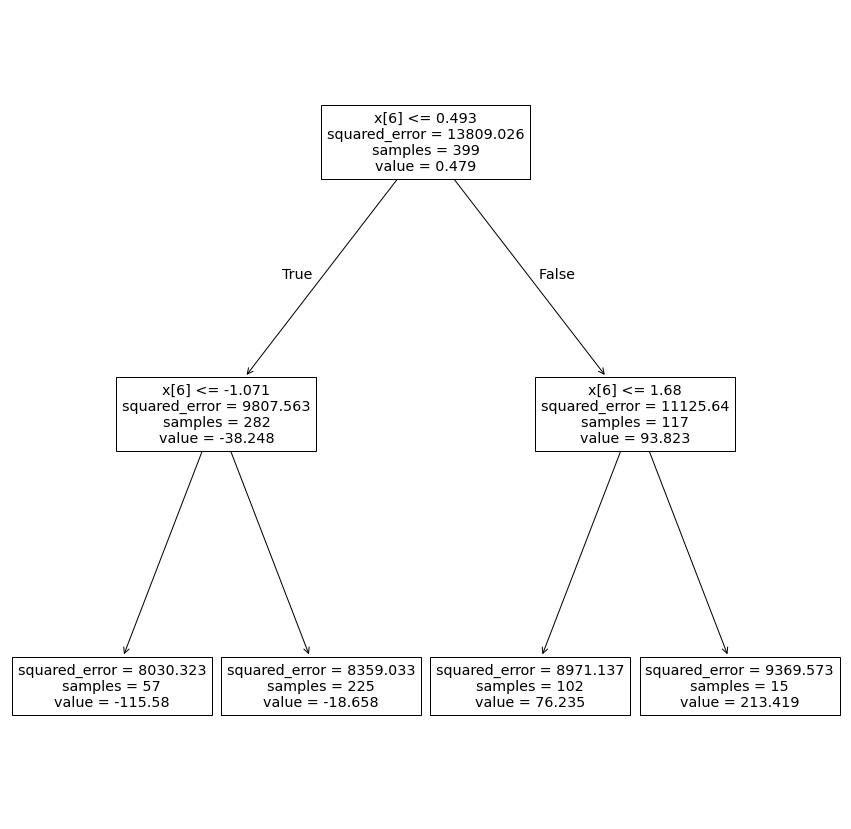

In [220]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure


figure(figsize=(15,15))
plot_tree(reg)
plt.show()

## Random Forest Multivariate Regresson

In [221]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor


In [222]:
parameter_grid = [
    {'max_depth': [*range(3,10)]
    ,'n_estimators':[*range(10,60,10)]
}]

clf = GridSearchCV(RandomForestRegressor(random_state=random_state), parameter_grid) 
clf.fit(Xtrain,ytrain)

print("The optimal depth of the full Random Forest Regressor is ", clf.best_estimator_.max_depth)
reg = clf.best_estimator_

The optimal depth of the full Random Forest Regressor is  3


In [223]:
y_true, y_pred = ytest, reg.predict(Xtest)
regressions_predict['random forest regression'] = y_pred
print("Decision Tree Regression - RMSE = {0:7.2f}".format(root_mean_squared_error(y_true, y_pred)))

Decision Tree Regression - RMSE =   85.02


### Plot the prediction of every model, compare it with the real test set, and print the metrics $R^2$ and RMSE 

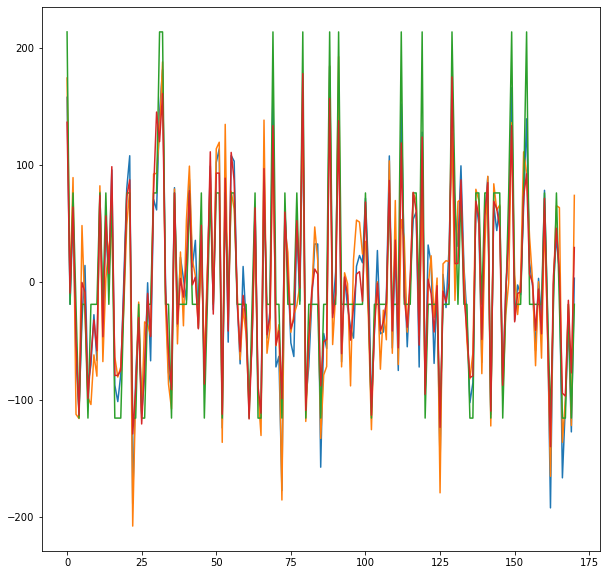

In [250]:
import numpy

figure(figsize=(10,10))
for name in regressions_predict:
    x = []
    plt.plot(regressions_predict[name])
    for i in range(0,len(ytest)):
        x.append(i)
    plt.
    #plt.scatter(x, ytest)
plt.show()

In [261]:
results = []

for name in regressions_predict:
    results.append({ 'Model': name, 'RMSE': root_mean_squared_error(y_true, y_pred), 'R_square': r2_score(y_true, y_pred)})

print(results)

[{'Model': 'univariate linear regression', 'RMSE': 85.02380126212428, 'R_square': 0.33999826235413855}, {'Model': 'linear regression', 'RMSE': 85.02380126212428, 'R_square': 0.33999826235413855}, {'Model': 'decision tree regression', 'RMSE': 85.02380126212428, 'R_square': 0.33999826235413855}, {'Model': 'random forest regression', 'RMSE': 85.02380126212428, 'R_square': 0.33999826235413855}]


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results